# (Part 2.) Introduction to GIS bases 

In [85]:
# Import the rasterio library for working with raster data
import rasterio
from rasterio.plot import show

# Import the numpy library for numerical computing
import numpy as np

# Import the pyplot module from matplotlib for plotting
import matplotlib.pyplot as plt


Before we start... 
- Does somebody knows what an array is? 
- and a matrix ? 

(ANETA: Indexing Demo :)

Arrays and matrices are both data structures used to store collections of elements, but they differ in their dimensions.  

**Array**: An array is a one-dimensional data structure that stores elements of the same data type sequentially. Each element in an array is accessed using an index. Arrays are versatile and can store various types of data, such as integers, strings, or even other arrays.


Shape

In the context of an array, "shape" refers to the dimensions of the array, representing the number of elements along each dimension. 

For example, in a 2D array, the shape would specify the number of rows and columns, while in a 3D array, it would include the number of rows, columns, and layers. 

The shape of an array is represented as a tuple of integers, where each integer corresponds to the size of the array along a particular dimension. 

Understanding the shape of an array is crucial for accessing and manipulating its elements effectively during data processing and analysis.

![](../images/array_shape.webp)

[Source: python_crashkurs_doc](https://fgnt.github.io/python_crashkurs_doc/include/numpy.html)

In [86]:
# Define an array
my_array = [1, 2, 3, 4, 5]

my_array

[1, 2, 3, 4, 5]

In [87]:
# Access elements of the array
print("First element:", my_array[0])  # Output: 1
print("Second element:", my_array[1])  # Output: 2

First element: 1
Second element: 2



**Matrix**: A matrix is a two-dimensional data structure that represents a grid of elements arranged in rows and columns. It is essentially a specialized form of an array where elements are organized in a rectangular shape. Matrices are commonly used in mathematics, computer graphics, and scientific computing for tasks like linear algebra operations, image processing, and solving systems of equations.

In [88]:
# Define a matrix (2D array)
my_matrix = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

my_matrix


[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [89]:
# Access elements of the matrix
print("Element at row 1, column 1:", my_matrix[0][0])  # Output: 1
print("Element at row 2, column 3:", my_matrix[1][2])  # Output: 6

Element at row 1, column 1: 1
Element at row 2, column 3: 6


And what is a dictionary (python type)? 

- used to store key-value pairs
- Each key in a dictionary must be unique   and it's used to retrieve the corresponding value. 
- Values in a dictionary can be of any data type (also they can be mixed)

In [95]:
my_dict = {'name': 'John', 'age': 30, 'city': 'New York'}


In [96]:
print(my_dict['name'])  # Output: John

John


##  Rasters 
Raster data in the simpliest of definition is an image. 
An image or any pixelated data where each pixel is associated with a specific geographical location. 
 

For instances let's create a random array: 

In [90]:
# Create a two dimension array (matrix) containing 5 x 5 cells.  
X=np.random.randint(25, size=(5, 5))
X

array([[15,  0, 18,  7, 11],
       [ 4,  3,  7, 21, 20],
       [22,  4,  1, 16,  6],
       [ 1,  6,  1, 19,  0],
       [23, 20,  9,  7,  9]])

And then lets visualize the array as an image with the value on each cell/"pixel":

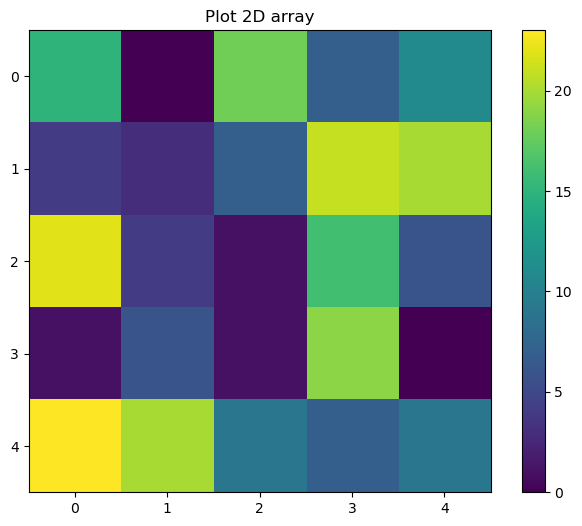

In [91]:
fig = plt.figure(figsize=(8,6))
plt.imshow(X)
plt.title("Plot 2D array")
plt.colorbar()
plt.show()

Now, the value of the raster can be, as shown above, (a) continuous or (b) categorical.

(a)  Continuous

In a continuous raster, the phenomena represented have no clear boundaries. 
The value assigned to each cell/pixel is what is found at the center of the cell. 
E.g to represent elevation, precipitation, chemical concentrations, or distance from a road...


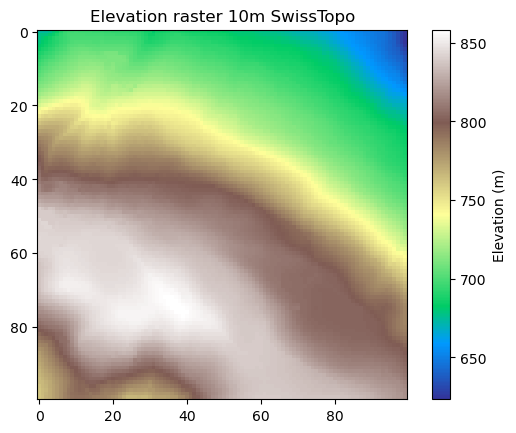

In [93]:
# Open the raster file
with rasterio.open("../data/SWISSALTI3D_TIFF_CHLV95_LN02/10m/SWISSALTI3D_10_TIFF_CHLV95_LN02_2600_1196.tif") as src:
    # Plot the raster using imshow
    plt.imshow(src.read(1), cmap='terrain')
    plt.colorbar(label='Elevation (m)')
    plt.title("Elevation raster 10m SwissTopo")
    plt.show()

(b)  Categorical ()

Represent thematic information. For example, this could be a file containing land cover data in raster format. Each pixel then has a value corresponding to a specific ground cover type (for instance, a pixel with the value 1 represents sand, a pixel with the value 2 represents water, etc.). 

 ![](../images/luse.webp)

 ([Source: CIVILGEO](https://.civilgeo.com/kb/land-use-data/))


### Rasters fun facts... 

- **Resolution**:
Rasters have a resolution, which determines the size of the grid cells. Higher resolution means smaller cells and more detail, while lower resolution means larger cells and less detail.

- **Raster Formats**:
Common raster formats include TIFF (Tagged Image File Format), JPEG, PNG, and GeoTIFF. Each format has its own characteristics and is suitable for different types of data and applications.

- **Spatial Reference**:
Raster data is georeferenced, meaning it is associated with a specific coordinate system and projection. (more on that later)



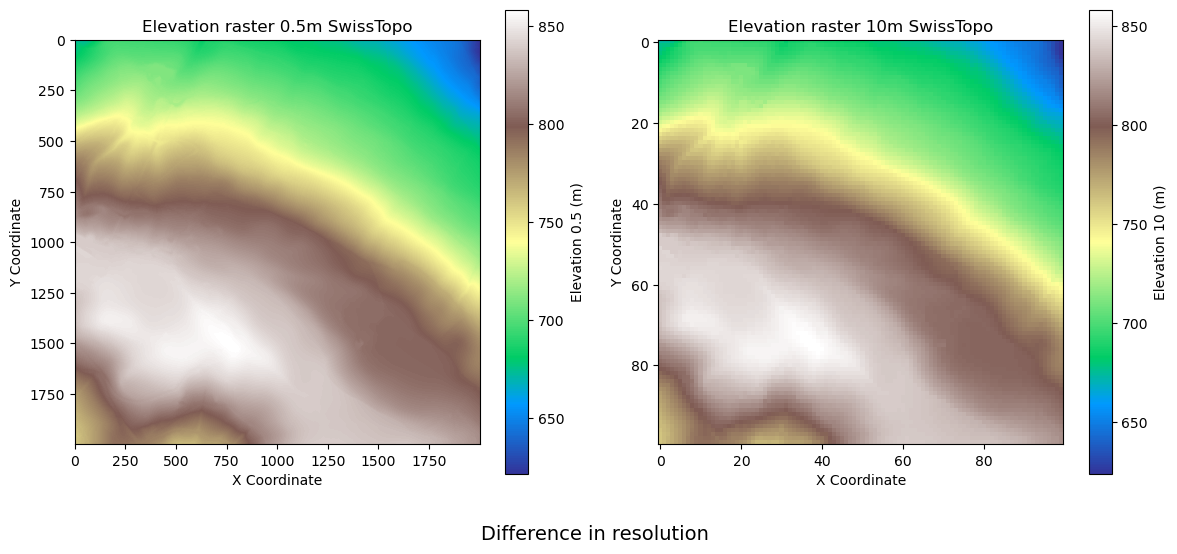

In [94]:
# Create a figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Open the raster file for 0.5m resolution
with rasterio.open("../data/SWISSALTI3D_TIFF_CHLV95_LN02/0.5m/SWISSALTI3D_0.5_TIFF_CHLV95_LN02_2600_1196.tif") as src:
    # Plot the raster using imshow
    im1 = axes[0].imshow(src.read(1), cmap='terrain')
    axes[0].set_title("Elevation raster 0.5m SwissTopo")
    axes[0].set_xlabel('X Coordinate')
    axes[0].set_ylabel('Y Coordinate')
    plt.colorbar(im1, ax=axes[0], label='Elevation 0.5 (m)')

# Open the raster file for 1m resolution
with rasterio.open("../data/SWISSALTI3D_TIFF_CHLV95_LN02/10m/SWISSALTI3D_10_TIFF_CHLV95_LN02_2600_1196.tif") as src:
    # Plot the raster using imshow
    im2 = axes[1].imshow(src.read(1), cmap='terrain')
    axes[1].set_title("Elevation raster 10m SwissTopo")
    axes[1].set_xlabel('X Coordinate')
    axes[1].set_ylabel('Y Coordinate')
    plt.colorbar(im2, ax=axes[1], label='Elevation 10 (m)')

# Adjust layout
plt.tight_layout()

# Add a common title below the subplots
plt.subplots_adjust(bottom=0.2)
plt.figtext(0.5, 0.1, 'Difference in resolution', ha='center', va='center', fontsize=14)


plt.show()

## Vectors vs. Rasters 
So to recap from last week, we have two fundamental data types use in Geographic Information Systems(GIS). which are *vectors and rasters*

Vectors consist of points, lines, and polygons that define discrete features on the Earth's surface, such as roads, rivers, and administrative boundaries. These features are represented by their geometric shapes and attributes, 

In contrast, rasters organize data into a grid of cells, where each cell contains a value representing a continuous or categorical attribute, such as elevation, temperature, or land cover type. 

![](../images/vecras.jpeg)

[Source: city of Tualatin Oregon](https://www.tualatinoregon.gov/maps/other-gis-resources)
